<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_1_6)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.6_n250.csv',
 'data_multi_delta_-1.6_n120.csv',
 'data_multi_delta_-1.6_n60.csv',
 'data_multi_delta_-1.6_n30.csv',
 'data_multi_delta_-1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.262363,21.109602,41.906081,-0.032242,149.245804,149.233031,0.012773
1,0.0,1.0,76.169979,81.831931,57.664375,-0.031014,225.635271,225.642066,-0.006795
2,0.0,2.0,74.498518,73.749340,79.235296,-0.013409,237.469745,237.462172,0.007573
3,0.0,3.0,56.669290,97.192652,74.737716,-0.044493,238.555165,238.607507,-0.052342
4,0.0,4.0,40.085820,27.616116,67.554366,0.065903,145.322205,145.263236,0.058969
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,66.363906,54.061491,42.164706,0.021518,172.611621,172.601928,0.009693
19996,999.0,16.0,58.671809,69.895646,57.917177,0.018542,196.503175,196.483549,0.019626
19997,999.0,17.0,32.526454,29.315356,36.822008,-0.026370,108.637448,108.671502,-0.034054
19998,999.0,18.0,60.329644,83.654796,74.167651,-0.034584,228.117506,228.145926,-0.028420


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.262363,21.109602,41.906081,-0.032242,149.245804,149.233031,0.012773
1,0.0,1.0,76.169979,81.831931,57.664375,-0.031014,225.635271,225.642066,-0.006795
2,0.0,2.0,74.498518,73.749340,79.235296,-0.013409,237.469745,237.462172,0.007573
3,0.0,3.0,56.669290,97.192652,74.737716,-0.044493,238.555165,238.607507,-0.052342
4,0.0,4.0,40.085820,27.616116,67.554366,0.065903,145.322205,145.263236,0.058969
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,66.363906,54.061491,42.164706,0.021518,172.611621,172.601928,0.009693
19996,999.0,16.0,58.671809,69.895646,57.917177,0.018542,196.503175,196.483549,0.019626
19997,999.0,17.0,32.526454,29.315356,36.822008,-0.026370,108.637448,108.671502,-0.034054
19998,999.0,18.0,60.329644,83.654796,74.167651,-0.034584,228.117506,228.145926,-0.028420


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    76.262363  21.109602  41.906081 -0.032242  149.245804   
      1.0    76.169979  81.831931  57.664375 -0.031014  225.635271   
      2.0    74.498518  73.749340  79.235296 -0.013409  237.469745   
      3.0    56.669290  97.192652  74.737716 -0.044493  238.555165   
      4.0    40.085820  27.616116  67.554366  0.065903  145.322205   
...                ...        ...        ...       ...         ...   
999.0 15.0   66.363906  54.061491  42.164706  0.021518  172.611621   
      16.0   58.671809  69.895646  57.917177  0.018542  196.503175   
      17.0   32.526454  29.315356  36.822008 -0.026370  108.637448   
      18.0   60.329644  83.654796  74.167651 -0.034584  228.117506   
      19.0   80.925530  47.375464  75.212545  0.036110  213.549649   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    149.233031  0.012773  
      1.0    225.642066 -0.006795  
      2.0    237.462172  0.007573  
      3.0    238.607507 -0.052342  
      4.0    145.263236  0.058969  
...                 ...       ...  
999.0 15.0   172.601928  0.009693  
      16.0   196.483549  0.019626  
      17.0   108.671502 -0.034054  
      18.0   228.145926 -0.028420  
      19.0   213.549365  0.000284  

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    76.262363  21.109602  41.906081 -0.032242  149.245804   
      1.0    76.169979  81.831931  57.664375 -0.031014  225.635271   
      2.0    74.498518  73.749340  79.235296 -0.013409  237.469745   
      3.0    56.669290  97.192652  74.737716 -0.044493  238.555165   
      4.0    40.085820  27.616116  67.554366  0.065903  145.322205   
...                ...        ...        ...       ...         ...   
999.0 15.0   66.363906  54.061491  42.164706  0.021518  172.611621   
      16.0   58.671809  69.895646  57.917177  0.018542  196.503175   
      17.0   32.526454  29.315356  36.822008 -0.026370  108.637448   
      18.0   60.329644  83.654796  74.167651 -0.034584  228.117506   
      19.0   80.925530  47.375464  75.212545  0.036110  213.549649   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    149.233031  0.012773  
      1.0    225.642066 -0.006795  
      2.0    237.462172  0.007573  
      3.0    238.607507 -0.052342  
      4.0    145.263236  0.058969  
...                 ...       ...  
999.0 15.0   172.601928  0.009693  
      16.0   196.483549  0.019626  
      17.0   108.671502 -0.034054  
      18.0   228.145926 -0.028420  
      19.0   213.549365  0.000284  

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.262363,21.109602,41.906081,-0.032242,149.245804,149.233031,0.012773
1,0.0,1.0,76.169979,81.831931,57.664375,-0.031014,225.635271,225.642066,-0.006795
2,0.0,2.0,74.498518,73.749340,79.235296,-0.013409,237.469745,237.462172,0.007573
3,0.0,3.0,56.669290,97.192652,74.737716,-0.044493,238.555165,238.607507,-0.052342
4,0.0,4.0,40.085820,27.616116,67.554366,0.065903,145.322205,145.263236,0.058969
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,66.363906,54.061491,42.164706,0.021518,172.611621,172.601928,0.009693
19996,999.0,16.0,58.671809,69.895646,57.917177,0.018542,196.503175,196.483549,0.019626
19997,999.0,17.0,32.526454,29.315356,36.822008,-0.026370,108.637448,108.671502,-0.034054
19998,999.0,18.0,60.329644,83.654796,74.167651,-0.034584,228.117506,228.145926,-0.028420


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    76.262363  21.109602  41.906081 -0.032242  149.245804   
      1.0    76.169979  81.831931  57.664375 -0.031014  225.635271   
      2.0    74.498518  73.749340  79.235296 -0.013409  237.469745   
      3.0    56.669290  97.192652  74.737716 -0.044493  238.555165   
      4.0    40.085820  27.616116  67.554366  0.065903  145.322205   
...                ...        ...        ...       ...         ...   
999.0 15.0   66.363906  54.061491  42.164706  0.021518  172.611621   
      16.0   58.671809  69.895646  57.917177  0.018542  196.503175   
      17.0   32.526454  29.315356  36.822008 -0.026370  108.637448   
      18.0   60.329644  83.654796  74.167651 -0.034584  228.117506   
      19.0   80.925530  47.375464  75.212545  0.036110  213.549649   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    149.233031  0.012773  
      1.0    225.642066 -0.006795  
      2.0    237.462172  0.007573  
      3.0    238.607507 -0.052342  
      4.0    145.263236  0.058969  
...                 ...       ...  
999.0 15.0   172.601928  0.009693  
      16.0   196.483549  0.019626  
      17.0   108.671502 -0.034054  
      18.0   228.145926 -0.028420  
      19.0   213.549365  0.000284  

[20000 rows x 7 columns]

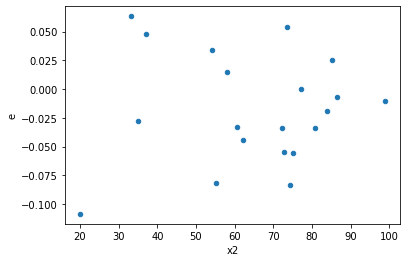

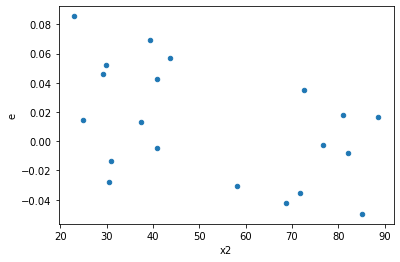

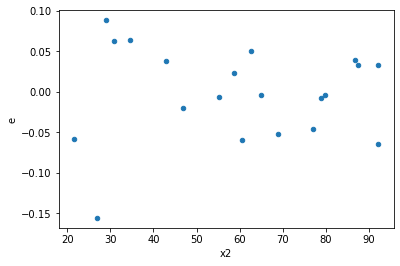

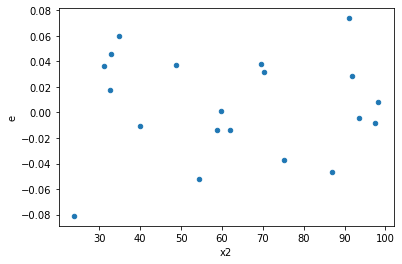

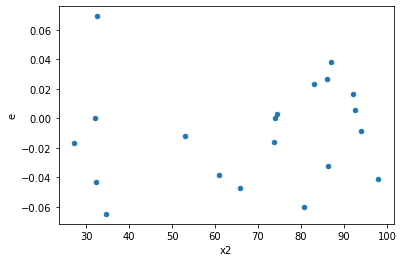

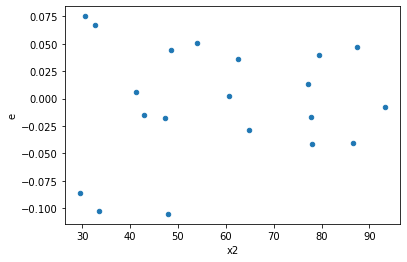

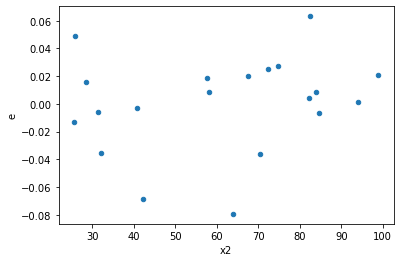

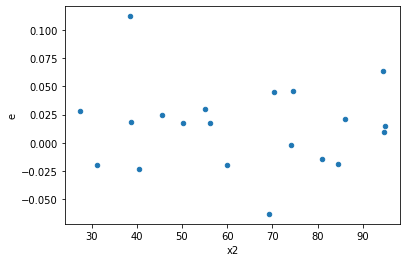

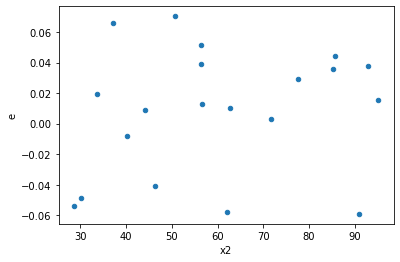

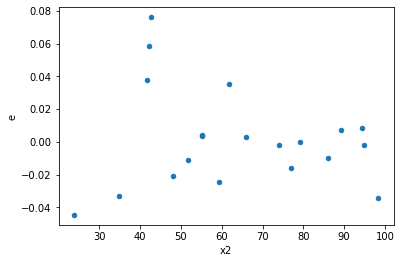

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,5.0,5.0,0.005438664395858307,0.020571350903647517,0.0010877328791716614,0.004114270180729503,3.7824269722016988,0.17059758996522167,0.9147012050173892,0.08529879498261084,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,0.002355375123779265,0.005062502526795418,0.00047107502475585297,0.0010125005053590835,2.1493402370117978,0.420867766816319,0.7895661165918405,0.2104338834081595,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,0.0019670168535857813,0.011180487935665347,0.00039340337071715626,0.0022360975871330694,5.683981769288774,0.07943693506168903,0.9602815324691555,0.039718467530844515,Reject005=1 : Homoscedasticity
15.0,5.0,5.0,0.007025289027243959,0.01298262118076246,0.0014050578054487918,0.002596524236152492,1.847983923567566,0.5166309176108081,0.7416845411945959,0.2583154588054041,Reject005=1 : Homoscedasticity
19.0,5.0,5.0,0.0037449940126394804,0.004030467674034696,0.0007489988025278961,0.0008060935348069393,1.0762280688384902,0.9377132074342667,0.5311433962828667,0.46885660371713334,Reject005=1 : Homoscedasticity
21.0,5.0,5.0,0.004304214262768456,0.006564171893605003,0.0008608428525536912,0.0013128343787210007,1.5250569541542642,0.6545743722397059,0.672712813880147,0.32728718611985297,Reject005=1 : Homoscedasticity
22.0,5.0,5.0,0.0022282544177877005,0.01307263442469305,0.0004456508835575401,0.00261452688493861,5.866760240813112,0.07460884631944009,0.96269557684028,0.037304423159720046,Reject005=1 : Homoscedasticity
24.0,5.0,5.0,0.0013813398365071492,0.002636014839365487,0.00027626796730142984,0.0005272029678730975,1.9083029169931889,0.495274734510188,0.752362632744906,0.247637367255094,Reject005=1 : Homoscedasticity
27.0,5.0,5.0,0.0030000267231268477,0.00359908191224532,0.0006000053446253695,0.000719816382449064,1.1996832843189122,0.8465243443999957,0.5767378278000022,0.42326217219999784,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,0.011722099000716848,0.006192244850388605,0.0023444198001433695,0.0012384489700777211,0.5282539287554155,0.500568859161887,Reject005=1 : Homoscedasticity
1.0,5.0,5.0,0.005438664395858307,0.020571350903647517,0.0010877328791716614,0.004114270180729503,3.7824269722016988,0.17059758996522167,Reject005=1 : Homoscedasticity
2.0,5.0,5.0,0.018740746734406035,0.001407750080267755,0.003748149346881207,0.000281550016053551,0.07511707512077276,0.012984513041797674,Reject005=0 : Heteroscedasticity
3.0,5.0,5.0,0.006632227313516342,0.0008868377061880978,0.0013264454627032684,0.00017736754123761955,0.13371642199005165,0.04550085290874305,Reject005=0 : Heteroscedasticity
4.0,5.0,5.0,0.019539585540482518,0.00261797586440696,0.0039079171080965034,0.000523595172881392,0.1339831829586653,0.04569019189106513,Reject005=0 : Heteroscedasticity
5.0,5.0,5.0,0.002355375123779265,0.005062502526795418,0.00047107502475585297,0.0010125005053590835,2.1493402370117978,0.420867766816319,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,0.0019670168535857813,0.011180487935665347,0.00039340337071715626,0.0022360975871330694,5.683981769288774,0.07943693506168903,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,0.009459003713217288,0.0065812398446035885,0.0018918007426434575,0.0013162479689207177,0.6957645904512616,0.7003038373306554,Reject005=1 : Homoscedasticity
8.0,5.0,5.0,0.016906469468794268,0.005503650833880855,0.0033812938937588534,0.0011007301667761708,0.32553519491691735,0.24352577342919543,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      805
Reject005=0 : Heteroscedasticity    195
Name: Result_test, dtype: int64